In [6]:
import numpy as np

In [13]:
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
raw_X = wine.data.features
raw_Y = wine.data.targets 

X = raw_X.to_numpy()
Y = raw_Y.to_numpy()


In [99]:
def squared_dist(x,y):
    return np.sum(np.square(x-y))

def find_NN(x,k, train_data):
    # for Leave one out cross validation range will be length of data sets - 1
    distances = [squared_dist(x,train_data[i]) for i in range(len(train_data))]
    
    return np.argmin(distances)


In [184]:
#Build Confusion Matrix
confusion = [[0,0,0],[0,0,0],[0,0,0]]
index = 0
errors = 0
for x in X:
    training_set = [item for i, item in enumerate(X) if i != index]
    nn_ind = find_NN(x, len(X), training_set)

    conf_act = Y[index][0] - 1
    conf_pred = Y[nn_ind][0] - 1

    if(conf_act != conf_pred):
        errors += 1
    
    confusion[conf_act][conf_pred] += 1
    
    index+=1

accuracy_rate =  1- errors/len(X)
print(accuracy_rate)
for v in confusion:
    print(*v)

0.7752808988764045
52 3 4
5 55 11
3 14 31


In [173]:
def find_kfold_error(k):
    index = 0
    per_fold = int(round(len(X) / k, 0))
    errors = 0

    while (index + per_fold) < len(X):
        
        test = [item for i, item in enumerate(X) if (i >= index and i < index+per_fold)]
        train = [item for i, item in enumerate(X) if (i < index or i >= index+per_fold)]

        i = index
        for data in test:
            nn_ind = find_NN(data, k, train)
            x_act = Y[nn_ind][0]
            x_pred = Y[i][0]
            
            if x_act != x_pred:
                errors+=1
            i+=1

        index+=per_fold

    return errors/len(X)

def find_kfold_error_scaled(k):
    index = 0
    per_fold = int(round(len(X) / k, 0))
    error_rates = []

    while (index + per_fold) < len(X):
        
        test = [item for i, item in enumerate(X) if (i >= index and i < index+per_fold)]
        train = [item for i, item in enumerate(X) if (i < index or i >= index+per_fold)]

        i = index
        errors = 0
        for data in test:
            nn_ind = find_NN(data, k, train)
            x_act = Y[nn_ind][0]
            x_pred = Y[i][0]
            
            if x_act != x_pred:
                errors+=1
            i+=1

        error_rates.append( errors/len(test) )
        
        index+=per_fold

    return sum(error_rates) / k

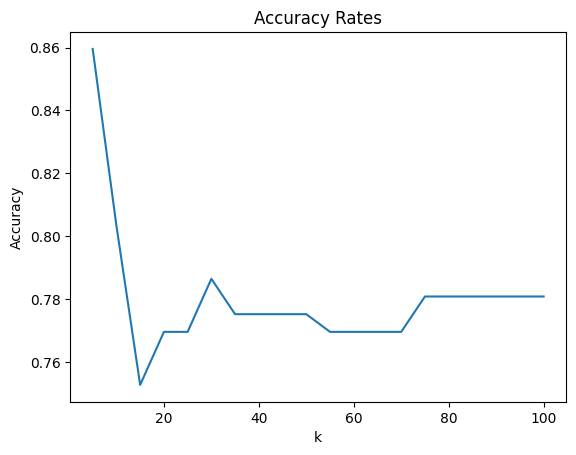

In [180]:
#20 k values from 2-100 at an interval of 5
k_vals = []
for i in range(5, 101, 5):
    k_vals.append(i) 


error_rates = []
for k in k_vals:
    error_rates.append(1-find_kfold_error(k))

figure, axis = plt.subplots()

axis.plot(k_vals, error_rates, label = 'Accuracy Rates')

axis.set_xlabel('k')
axis.set_ylabel('Accuracy')
axis.set_title('Accuracy Rates')

plt.show()

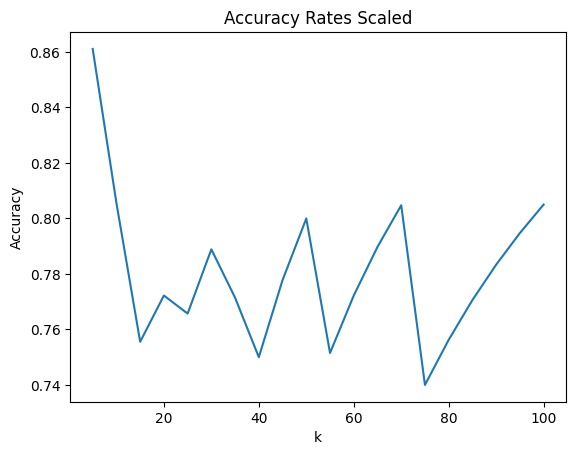

In [189]:

error_rates = []
for k in k_vals:
    error_rates.append(1-find_kfold_error_scaled(k))

figure, axis = plt.subplots()

axis.plot(k_vals, error_rates, label = 'Accuracy Rates Scaled')

axis.set_xlabel('k')
axis.set_ylabel('Accuracy')
axis.set_title('Accuracy Rates Scaled')

plt.show()